# Homework #1 - The Linear Model

Matric Number: A0113598X

Email: a0113598@u.nus.edu

### General Notes about this assignment 

Hi, thanks for grading.

### Files included with this submission

#### hw1-1.ipynb
Solutions to programming questions

#### essay-1.pdf
Solutions to essay questions


## Programming Exercise 1

In [2]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
%matplotlib inline
# Plotting with style! 
import seaborn as sb 

# Size the plot appropriately for online display
pl.rcParams['figure.figsize'] = (12.0, 10.0)

Let's fix the random number generator first, in case we need results that are replicable.

In [3]:
nr.seed(3244)

In [4]:
#    Write your solution to the programming assignment here.  We've suggested some cells that you can add 
#    to your notebook as single line comments below.
#    Please place all of your cells to be run in a linear, unintervened order, such that we can automate
#    the running and grading of the assignment.

# load datasets code
from io import StringIO

def read_data_file(file_name):
	f = open(file_name, "r")
	mat = np.loadtxt(StringIO(f.read()))
	X = mat[:, :-1]
	X = np.insert(X, 0, 1, axis = 1)
	y = np.matrix(mat[:, -1]).T
	return (X, y)

X_train, Y_train = read_data_file("hw1-train.dat")
N, M = X_train.shape

X_test, Y_test = read_data_file("hw1-test.dat")

# LR code

def lr(x, y, w, eta):
	'''
	    Input: 
	        xn : Data points
	        yn : Classification of the previous data points
	        w  : initial weight
	        eta : step size
	    Output: 
	        w : updated weight
	'''
	n = x.shape[0]
	g = - np.sum(
			np.multiply(x, y) / (1 + np.exp(np.multiply(y, (np.dot(x, w))))),
			0
		) / n
	w = w - eta * g.T
	return w
    
# Evaluation code

# calculate the in sample error given w
def calculate_error(xn, yn, w):
	N = xn.shape[0]
	e = np.sum(np.log(1 + np.exp(np.multiply(-yn, (np.dot(xn, w)))))) / N
	# print(e)
	return e

# sigmoid function which can be applied to a vector
def sigmoid(s):
	exp_s = np.exp(s)
	return np.divide(exp_s, (1 + exp_s))

# calculates the E_out given data, classification, and weights
def out_error(xn, yn, w):
	N = xn.shape[0]
	prediction = (sigmoid(np.dot(xn, w)) > 0.5)
	real_class = (yn > 0)
	e = np.sum(prediction != real_class) / N
	return e

def evaluate_batch_GD(eta, iteration):
	'''
		Run batch GD using X_train and Y_train
		Input:
			eta: step size
			iteration: number of iteration of SGD
		output:
			w : final weights
			E_out: Error for out samples using X_test and Y_test
	'''
	w = np.zeros([M, 1])
	for i in range(iteration):
	    # calculate_error(X_train, Y_train, w)
	    w = lr(X_train, Y_train, w, eta)
	E_out = out_error(X_test, Y_test, w)
	return (w.T.tolist()[0], E_out)

def evaluate_deterministic(eta, iteration):
	'''
		Run deterministic gradient descent using X_train and Y_train
		Input:
			eta: step size
			iteration: number of iteration of gradient descent
		output:
			w : final weights
			E_out: Error for out samples using X_test and Y_test
	'''
	w = np.zeros([M, 1])
	for i in range(iteration):
		# calculate_error(X_train, Y_train, w)
		index = i % N
		w = lr(np.mat(X_train[index, :]), Y_train[index], w, eta)
	E_out = out_error(X_test, Y_test, w)
	return (w.T.tolist()[0], E_out)

In [5]:
# part a
w, E_out = evaluate_batch_GD(0.05, 2333)
print("a: eta = 0.05, T = 2333")
print("Eventual weight vector:")
print(w)
print("E_out:", E_out, "\n")

a: eta = 0.05, T = 2333
Eventual weight vector:
[-0.11619989953257719, -0.6230638861458144, 0.8305469786461496, -1.0934973403011155, 0.05572273780420709, -1.1139138777344821, -0.01296554708163875, 1.1124953425644475, -0.8158812303486359, 0.4309260722643113, 1.4234615491768565, 0.27688543057003007, -0.8809569714738537, -0.5974162096293617, 0.8570422509145481, 1.1536100733824346, 1.3039896671074884, -1.3480710066622439, 1.3424348786513614, -0.6163682044354375, -1.1006430680003119]
E_out: 0.184333333333 



In [6]:
# part b
w, E_out = evaluate_batch_GD(0.005, 2333)
print("b: eta = 0.005, T = 2333")
print("Eventual weight vector:")
print(w)
print("E_out:", E_out, "\n")

b: eta = 0.005, T = 2333
Eventual weight vector:
[0.006885550310671467, -0.11440970104349153, 0.17133392051185675, -0.21953817780911974, 0.03143198111060321, -0.23767226697862284, 0.01827846966222283, 0.21209126258519115, -0.1624184168038865, 0.08772493345745595, 0.31631168396518783, 0.05802731776823319, -0.15479095606960339, -0.09603835038685483, 0.1954484354425996, 0.25837087267201747, 0.27707535469407557, -0.29100915213236694, 0.2758915978261983, -0.12857103153081947, -0.2300694440172345]
E_out: 0.263666666667 



In [7]:
# part c1
w, E_out = evaluate_deterministic(0.05, 2333)
print("c1: eta = 0.05, T = 2333, deterministic")
print("Eventual weight vector:")
print(w)
print("E_out:", E_out, "\n")

c1: eta = 0.05, T = 2333, deterministic
Eventual weight vector:
[-0.13610500359911668, -0.7150913932415007, 0.8717352150115322, -1.154714245501358, -0.045438363710803197, -1.115596647678838, -0.05679034454126243, 1.0837057868511475, -0.9282516677434587, 0.42471630207031263, 1.4044058735614782, 0.17829297031538058, -0.7907827543185034, -0.6985461402096789, 0.8544660529869277, 1.1306861114378421, 1.2962022062852563, -1.4799120604127365, 1.4143478871384092, -0.660070256376233, -1.075539502411732]
E_out: 0.222666666667 



In [8]:
# part c2
w, E_out = evaluate_deterministic(0.005, 2333)
print("c2: eta = 0.05, T = 2333, deterministic")
print("Eventual weight vector:")
print(w)
print("E_out:", E_out, "\n")

c2: eta = 0.05, T = 2333, deterministic
Eventual weight vector:
[-0.005875693602769199, -0.13261359159470543, 0.17183769594011655, -0.23245823928057677, -0.0012891321734609042, -0.24747490809580605, 0.0045451998305737935, 0.20677978266374547, -0.17993032851840574, 0.0843912956795223, 0.3081290631681284, 0.03496957725214282, -0.14550272003141143, -0.10943277154337425, 0.18726770702824722, 0.24725378855802674, 0.26877878824415435, -0.3136832011330745, 0.27764022295336366, -0.13889373933176044, -0.2224711733615254]
E_out: 0.193333333333 



0.8
0.6857142857142857
0.5714285714285714
0.4571428571428572
0.34285714285714286
0.22857142857142854
0.11428571428571432


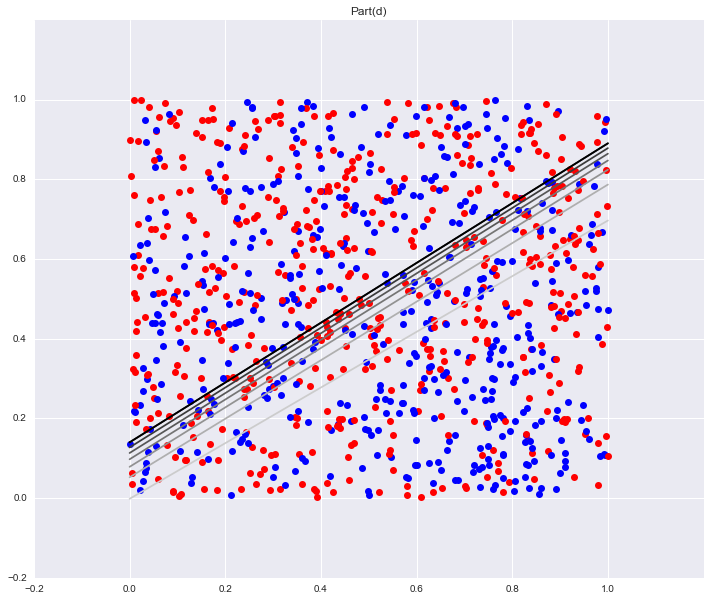

In [19]:
# obtain the separator function from given weight
def separator_function(w):
	def f(x):
		b = - w[0, 0] / w[2, 0]
		a = - w[1, 0] / w[2, 0]
		return a * x + b
	return f

def part_d():
	x = np.linspace(0,1)
	pl.figure()
	axes = pl.gca()
	axes.set_xlim([-0.2, 1.2])
	axes.set_ylim([-0.2, 1.2])

	# draw the points
	for i in range(N):
		if Y_train[i] > 0:
			pl.plot(X_train[i, 1], X_train[i, 2], 'ro')
		else:
			pl.plot(X_train[i, 1], X_train[i, 2], 'bo')

	# draw the separator at each 2333 step
	w = np.zeros([M, 1])
	for i in range(1, 2333 + 1):
	    w = lr(X_train, Y_train, w, 0.05)
	    if not i % 333:
	    	color = str(0.8 - (i / 333 - 1) * (0.8 / 7))
	    	pl.plot(x, separator_function(w)(x), color)

	# draw the separator after the last iteration
	pl.plot(x, separator_function(w)(x), 'k')
	pl.title('Part(d)')
	pl.show()

part_d()

## Statement of Individual Work

Please initial (between the square brackets) one of the following statements.

[ZYC] I, A0113598X, certify that I have followed the CS 3244 Machine Learning class guidelines for homework assignments.  In particular, I expressly vow that I have followed the Facebook rule in discussing with others in doing the assignment and did not take notes (digital or printed) from the discussions.  

[ ] I, <*substitute your matric number here*>, did not follow the class rules regarding the homework assignment, because of the following reason:

<*Please fill in*>

I suggest that I should be graded as follows:

<*Please fill in*>

### References

I have refered to the following list of people and websites in preparing my homework submission:

I googled for some numpy and latex syntax